## Observations and Insights

## Dependencies and starter code

In [33]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
import seaborn as sns
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#mouse_metadata.head()
#study_results.head()
merged_data = pd.merge(mouse_metadata,study_results,on="Mouse ID")
merged_data
#merged_data['Drug Regimen'].unique()
#ramicane = merged_data[merged_data['Drug Regimen'].str.match('Ramicane')]
#ramicane['Tumor Volume (mm3)'].describe()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugregimen= merged_data.groupby("Drug Regimen")
drugregimen["Tumor Volume (mm3)"].describe()
count=drugregimen["Tumor Volume (mm3)"].describe()["count"]
Mean=drugregimen["Tumor Volume (mm3)"].describe()["mean"]
Median=drugregimen["Tumor Volume (mm3)"].describe()["50%"]
STD=drugregimen["Tumor Volume (mm3)"].describe()["std"]
Variance=drugregimen["Tumor Volume (mm3)"].var()
SEM=drugregimen["Tumor Volume (mm3)"].sem()
drugsummary=pd.DataFrame({"Count":count,"Mean":Mean,"Median":Median,"Standard Deviation":STD,
                               "Variance":Variance,"SEM":SEM})
drugsummary
drugsummary.reset_index(inplace=True)
drugsummary

,Drug Regimen,Count,Mean,Median,Standard Deviation,Variance,SEM
0,Capomulin,230.0,40.675741,41.557809,4.994774,24.947764,0.329346
1,Ceftamin,178.0,52.591172,51.776157,6.268188,39.290177,0.469821
2,Infubinol,178.0,52.884795,51.820584,6.567243,43.128684,0.492236
3,Ketapril,188.0,55.235638,53.698743,8.279709,68.553577,0.603860
4,Naftisol,186.0,54.331565,52.509285,8.134708,66.173479,0.596466
5,Placebo,181.0,54.033581,52.288934,7.821003,61.168083,0.581331
6,Propriva,161.0,52.322552,50.854632,6.507770,42.351070,0.512884
7,Ramicane,228.0,40.216745,40.673236,4.846308,23.486704,0.320955
8,Stelasyn,181.0,54.233149,52.431737,7.710419,59.450562,0.573111
9,Zoniferol,182.0,53.236507,51.818479,6.966589,48.533355,0.516398


## Bar plots

<IPython.core.display.Javascript object>


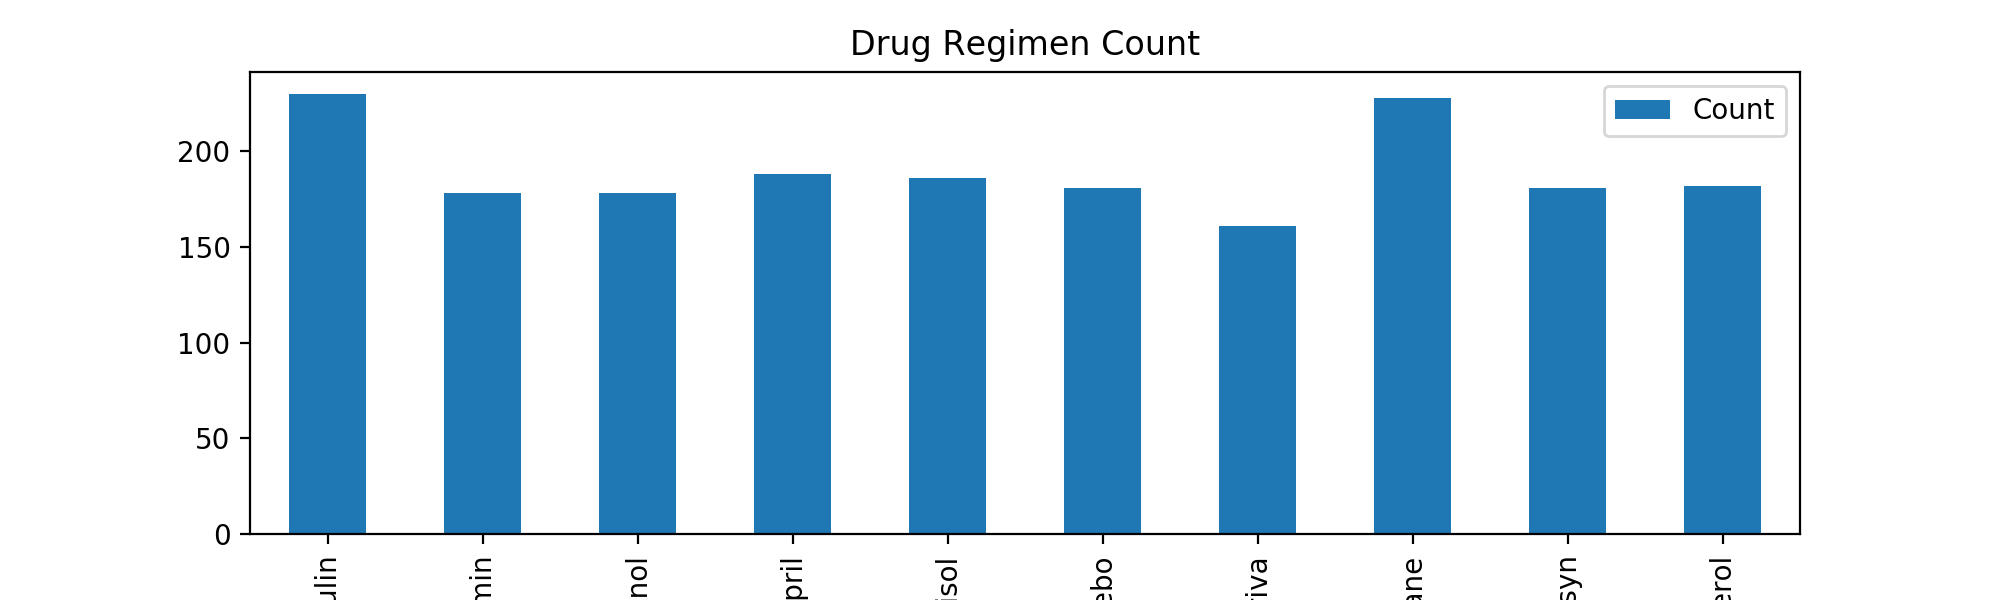

In [7]:
#drugsummary["Count"].plot(kind="bar")
#pandas
drugsummarytable= drugsummary[["Drug Regimen","Count"]]
drugsummarytable = drugsummarytable.set_index("Drug Regimen","Count")
drugsummarytable.plot(kind="bar", figsize=(10,3),title='Drug Regimen Count')




<IPython.core.display.Javascript object>


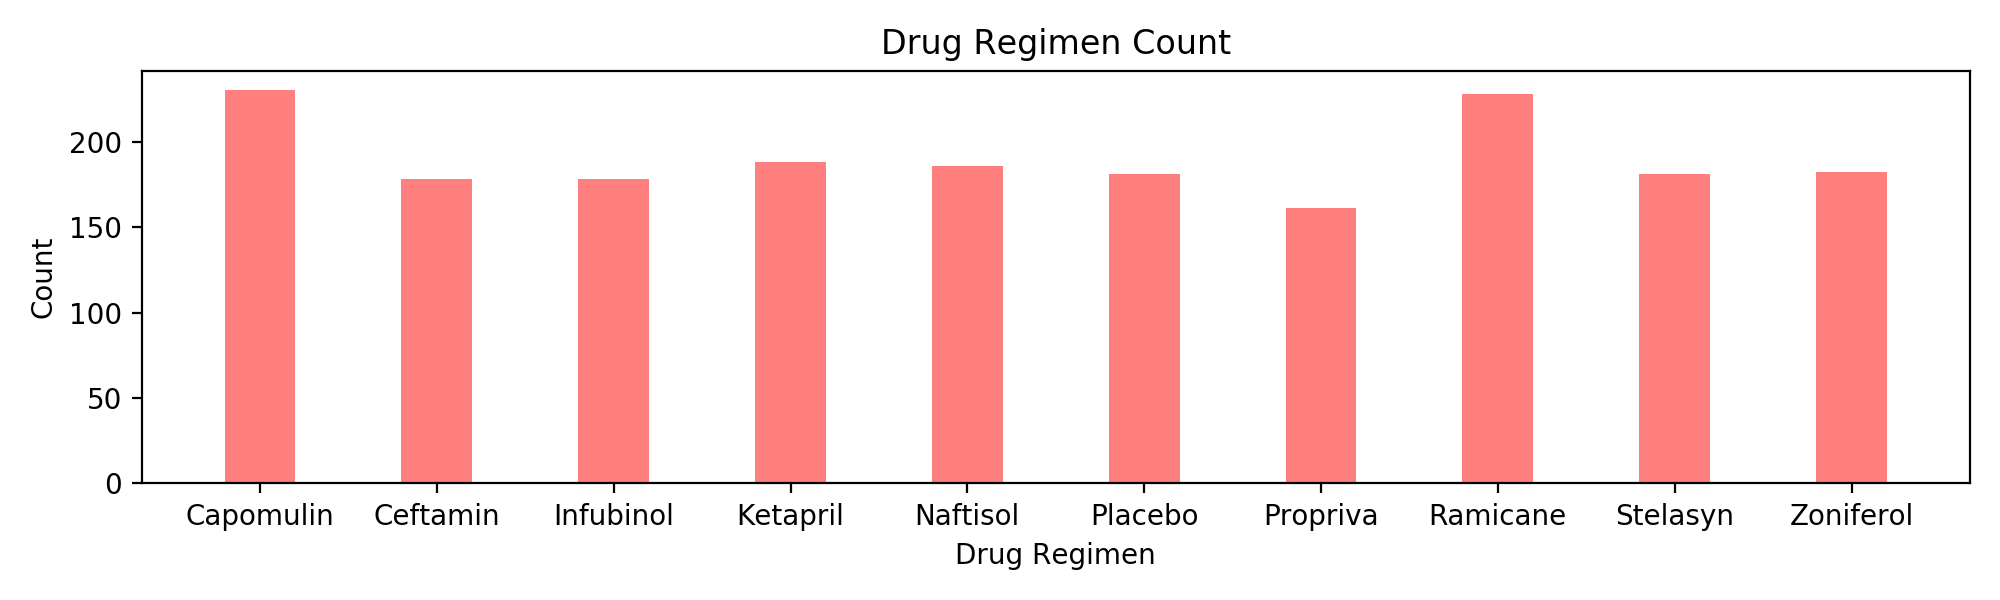

In [10]:
#pyplot
#x_axis = np.arange(len(drugsummarytable))
#tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(drugsummary["Drug Regimen"], drugsummary["Count"], color='r', alpha=0.5, align="center",width=0.40)
#plt.xticks(tick_locations, drugsummarytable["Drug Regimen"], rotation="horizontol")
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()

In [12]:
mice_gender = merged_data.groupby("Sex").count()
mice_gender.head()
mice_gender.reset_index(inplace=True)
mice_gender.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


## Pie plots

<IPython.core.display.Javascript object>


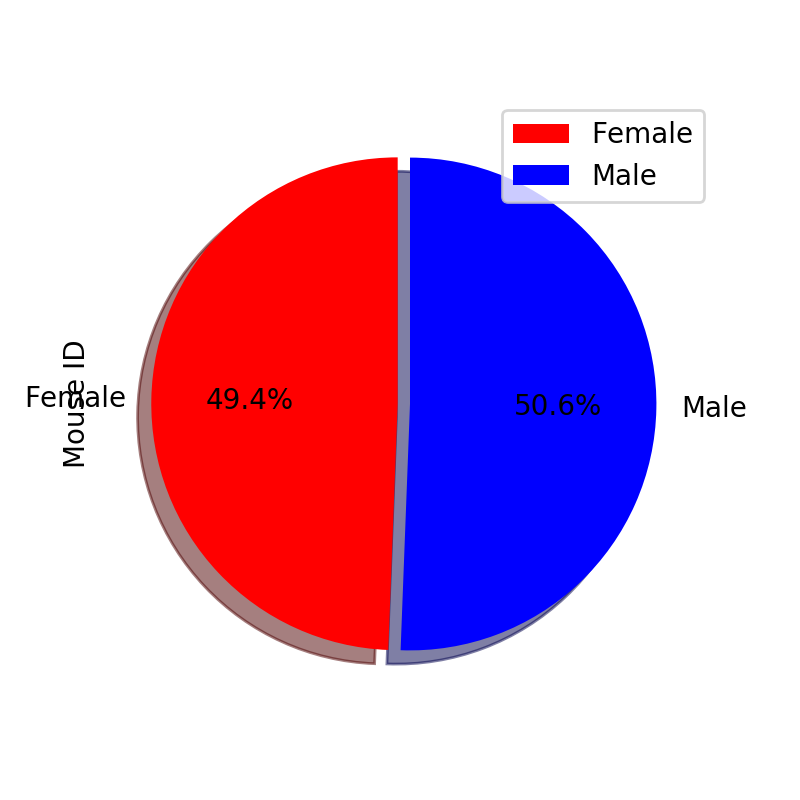

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#genderpie2 = mice_gender.plot(kind="pie",subplots=True,title = "Male vs Female")
colors = ("red","blue")
labels = ("Female","Male")
explode = (0.05,0)
angle = 90
plot = mice_gender.plot.pie(y='Mouse ID', colors=colors,labels=labels,figsize=(4,4),shadow=True,explode=explode, startangle=angle,autopct='%1.1f%%')

(-1.1576632884343911,
 1.105212624864745,
 -1.1046090826010622,
 1.1012191231463642)

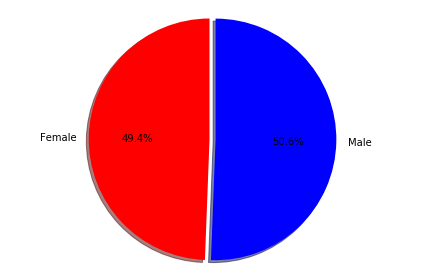

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = (0.05,0)
colors=('red','blue')
genderpie = plt.pie(mice_gender['Mouse ID'],explode=explode,colors=colors,labels=mice_gender['Sex'],shadow=True,startangle=90,autopct='%1.1f%%',)
plt.tight_layout()
plt.axis("equal")


## Quartiles, outliers and boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
FourRegimensForStudy = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
Capomulin=pd.DataFrame((merged_data.loc[(merged_data["Drug Regimen"] == 'Capomulin')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Ramicane=pd.DataFrame((merged_data.loc[(merged_data["Drug Regimen"] == 'Ramicane')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Infubinol=pd.DataFrame((merged_data.loc[(merged_data["Drug Regimen"] == 'Infubinol')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())
Ceftamin=pd.DataFrame((merged_data.loc[(merged_data["Drug Regimen"] == 'Ceftamin')]).sort_values(by=["Timepoint"]).groupby('Mouse ID').last())

#For Capomulin
capquarts = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
caplq = capquarts[0.25]
capuq = capquarts[0.75]
capiqr= capuq-caplq
caplb = caplq - (1.5*capiqr)
capub = capuq + (1.5*capiqr)
capoutliers = Capomulin.loc[(Capomulin['Tumor Volume (mm3)'] < caplb) |( Capomulin['Tumor Volume (mm3)'] > capub)]
capboxplot = pd.DataFrame({"Drug":"Capomulin","Lower_Quartiles":caplq,"Median":capquarts[0.5],"Upper Quartiles":capuq,"IQR":capiqr,"Lower Bound":caplb,"Upper Bound":capub}, index=[0])
capoutliers

#For Ramicane
ramquarts = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramlq = ramquarts[0.25]
ramuq = ramquarts[0.75]
ramiqr= ramuq-ramlq
ramlb = ramlq - (1.5*ramiqr)
ramub = ramuq + (1.5*ramiqr)
ramoutliers = Ramicane.loc[(Ramicane['Tumor Volume (mm3)'] < ramlb) |( Ramicane['Tumor Volume (mm3)'] > ramub)]
ramboxplot = pd.DataFrame({"Drug":"Ramicane","Lower_Quartiles":ramlq,"Median":ramquarts[0.5],"Upper Quartiles":ramuq,"IQR":ramiqr,"Lower Bound":ramlb,"Upper Bound":ramub}, index=[0])
ramoutliers

#For Infubinol
infquarts = Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inflq = infquarts[0.25]
infuq = infquarts[0.75]
infiqr= infuq-inflq
inflb = inflq - (1.5*infiqr)
infub = infuq + (1.5*infiqr)
infoutliers = Infubinol.loc[(Infubinol['Tumor Volume (mm3)'] < inflb) |( Infubinol['Tumor Volume (mm3)'] > infub)]
infboxplot = pd.DataFrame({"Drug":"Infubinol","Lower_Quartiles":inflq,"Median":infquarts[0.5],"Upper Quartiles":infuq,"IQR":infiqr,"Lower Bound":inflb,"Upper Bound":infub}, index=[0])
infoutliers

#For Ceftamin
cefquarts = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceflq = cefquarts[0.25]
cefuq = cefquarts[0.75]
cefiqr= cefuq-ceflq
ceflb = ceflq - (1.5*cefiqr)
cefub = cefuq + (1.5*cefiqr)
cefoutliers = Ceftamin.loc[(Ceftamin['Tumor Volume (mm3)'] < ceflb) |( Ceftamin['Tumor Volume (mm3)'] > cefub)]
cefboxplot = pd.DataFrame({"Drug":"Ceftamin","Lower_Quartiles":ceflq,"Median":cefquarts[0.5],"Upper Quartiles":cefuq,"IQR":cefiqr,"Lower Bound":ceflb,"Upper Bound":cefub}, index=[0])
cefoutliers

Acrossalldrugs=pd.DataFrame()
Acrossalldrugs=Acrossalldrugs.append(capboxplot)
Acrossalldrugs=Acrossalldrugs.append(ramboxplot)
Acrossalldrugs=Acrossalldrugs.append(infboxplot)
Acrossalldrugs=Acrossalldrugs.append(cefboxplot)
Acrossalldrugs

,Drug,Lower_Quartiles,Median,Upper Quartiles,IQR,Lower Bound,Upper Bound
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
0,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811
0,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
0,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458


<IPython.core.display.Javascript object>


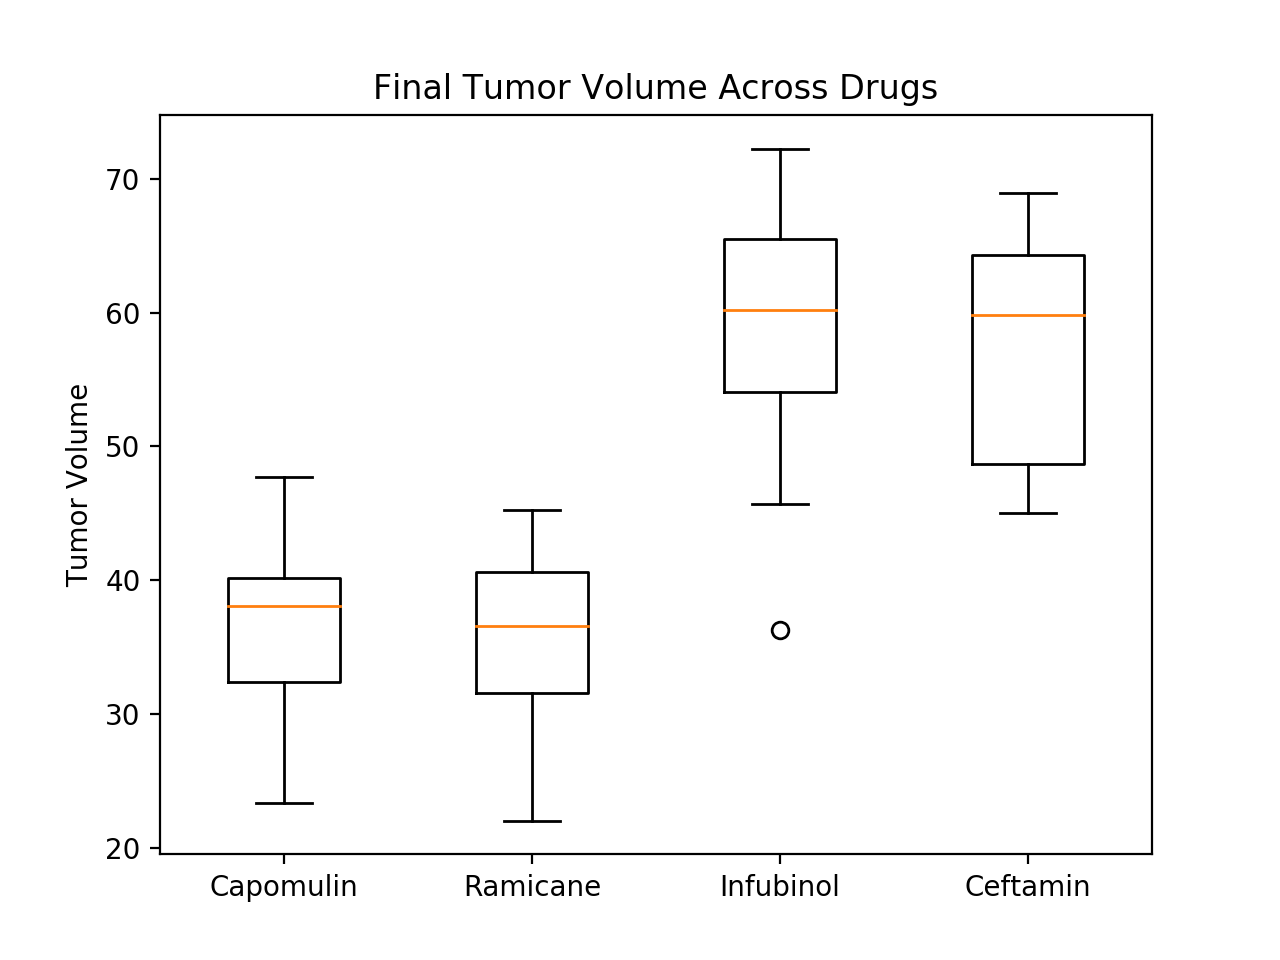

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Drugs')
ax1.set_ylabel('Tumor Volume')
acrossdrugs = [Capomulin["Tumor Volume (mm3)"],Ramicane["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"]]
ax1.boxplot(acrossdrugs,labels=FourRegimensForStudy)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


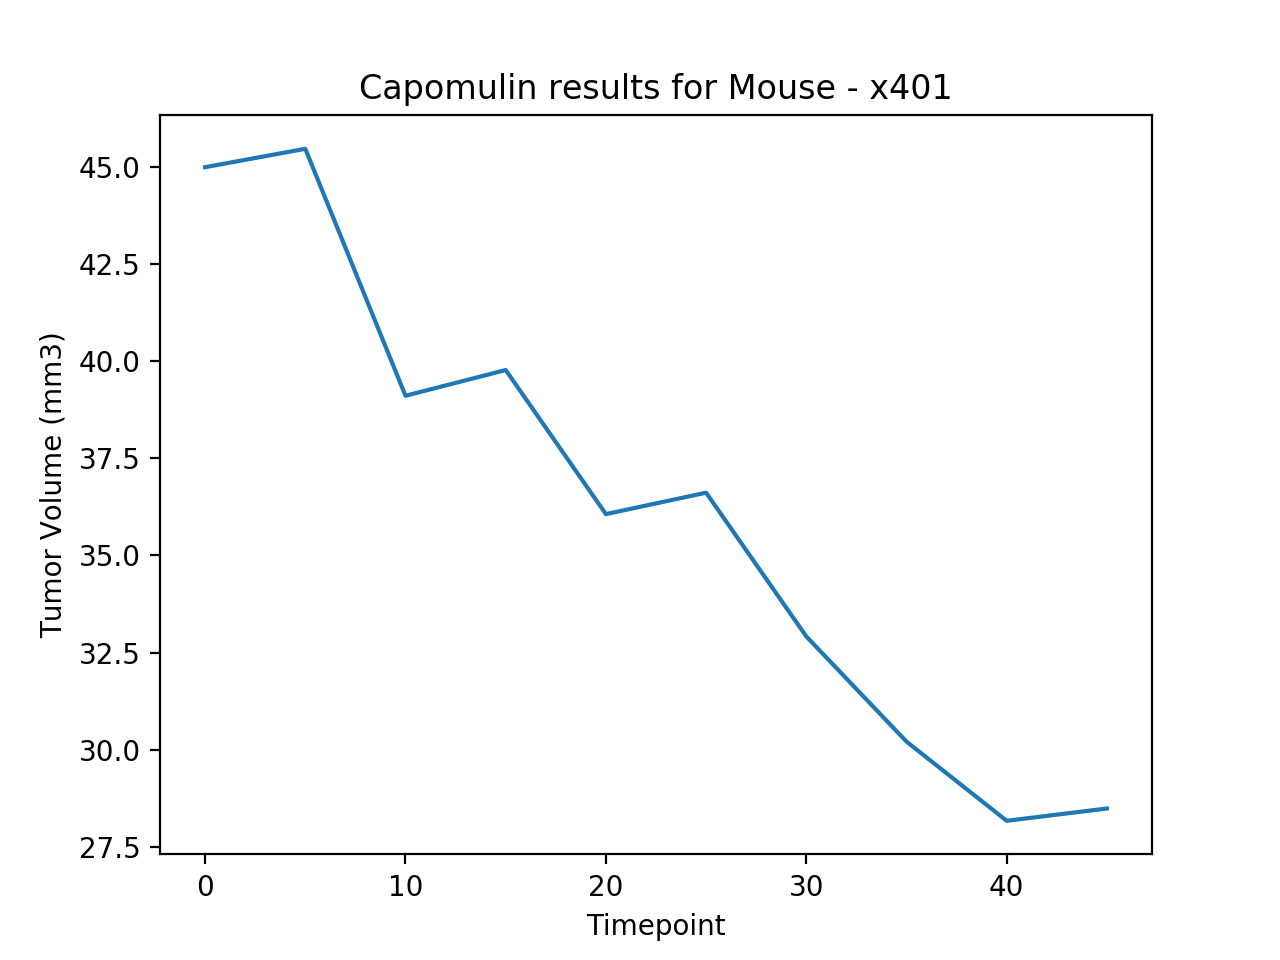

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merged_data.loc[merged_data['Drug Regimen'] == "Capomulin"]
x401tv = capomulin_df.loc[capomulin_df['Mouse ID'] == 'x401']
time = x401tv['Timepoint']
volume = x401tv['Tumor Volume (mm3)']
fig3, ax3 = plt.subplots()
plt.plot(time, volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin results for Mouse - x401")
plt.show()

<IPython.core.display.Javascript object>


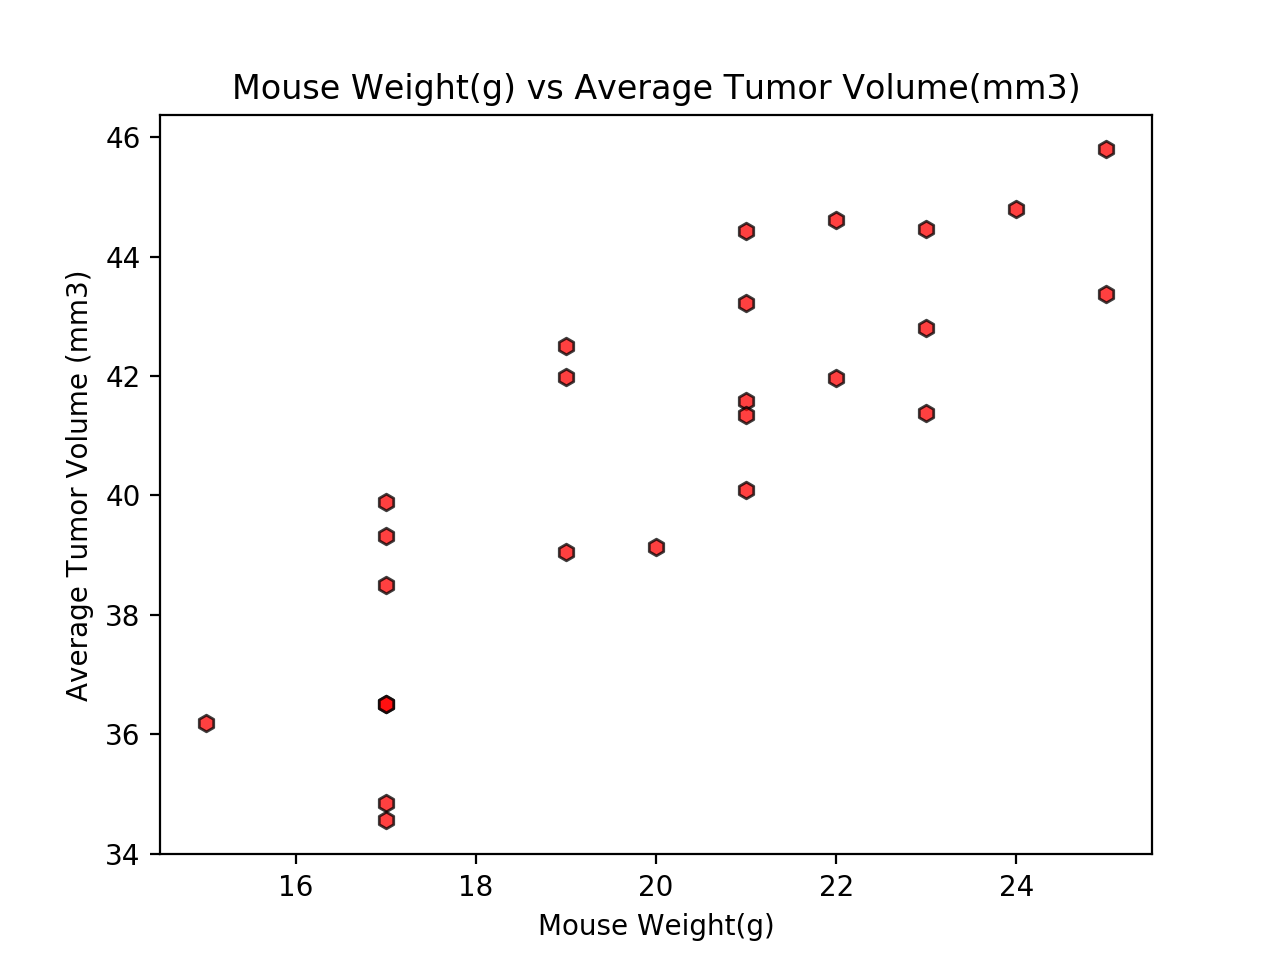

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_scatter = capomulin_df.groupby("Mouse ID")
cap_weight = cap_scatter['Weight (g)'].mean()
cap_meanv = cap_scatter['Tumor Volume (mm3)'].mean()
weight = []
for row in cap_weight:
    weight.append(row)
meanv = []
for row in cap_meanv:
    meanv.append(row)
fig4, ax4 = plt.subplots()
plt.scatter(weight, meanv, marker="h", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Mouse Weight(g) vs Average Tumor Volume(mm3)")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


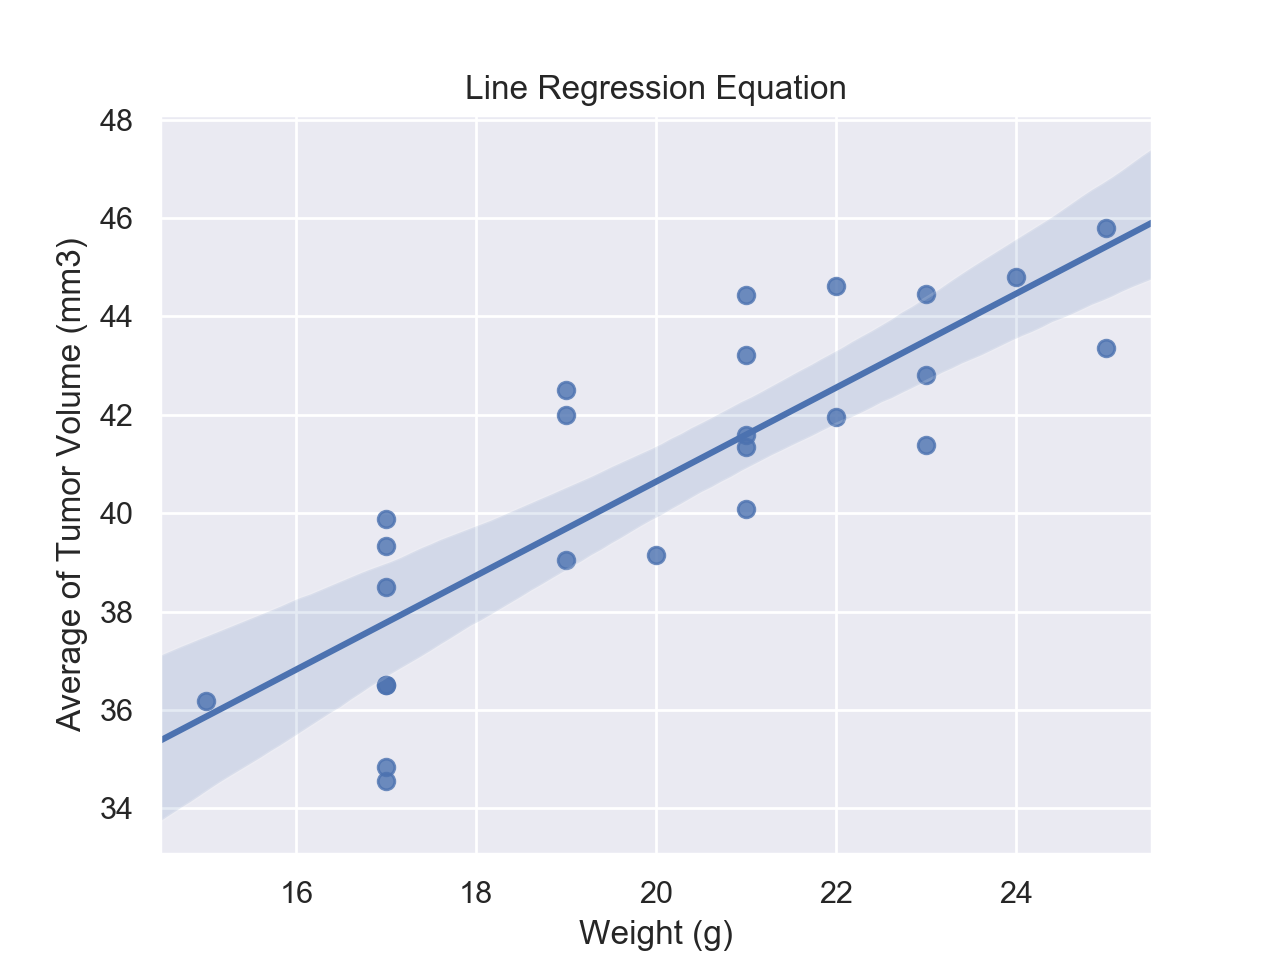

Text(0.5, 1.0, 'Line Regression Equation')

In [35]:
weight = []
for row in cap_weight:
    weight.append(row)
meanv = []
for row in cap_meanv:
    meanv.append(row)


#Calculating Correlation coefficient
CorCoef = st.pearsonr(weight,meanv)
print(f"The correlation between both factors is {round(CorCoef[0],2)}")

#Calculating Linear Regression Model

# Add the linear regression equation and line to plot
fig5, ax5 = plt.subplots()
sns.set(color_codes=True)
df = pd.DataFrame(list(zip(weight, meanv)))
sns.regplot(x=weight, y=meanv, data=df);

plt.xlabel("Weight (g)")
plt.ylabel("Average of Tumor Volume (mm3)")
plt.title("Line Regression Equation")